<a href="https://colab.research.google.com/github/KaifArman/data-project/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the Dependencies**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the train data
train_data = pd.read_csv('/content/drive/My Drive/Big Mart Sales Prediction Data/Train.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Data Collection and Processing**

In [ ]:
# loading the data from csv file to Pandas DataFrame
data = pd.read_csv('/content/drive/My Drive/Big Mart Sales Prediction Data/Train.csv')

# first 5 rows of the dataframe
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# number of data points & number of features
data.shape

(8523, 12)

In [ ]:
# getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


***Categorical Features:***

*   Item_Identifier
*   Item_Fat_Content
*   Item_Type
*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Location_Type
*   Outlet_Type





In [ ]:
# checking for missing values
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


# **Handling Missing Values**

In [ ]:
# mean value of "Item_Weight" column
data['Item_Weight'].mean()

12.857645184135976

In [ ]:
# filling the missing values in "Item_weight" column with "Mean" value
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [ ]:
# checking for missing values
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
# mode of "Outlet_Size" column
data['Outlet_Size'].mode()

,Outlet_Size
0,Medium


In [ ]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
miss_values = data['Outlet_Size'].isnull()

In [ ]:
data.loc[miss_values, 'Outlet_Size'] = data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [ ]:
# checking for missing values
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


# **Data Analysis**

In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### ***Numerical Features***

In [ ]:
sns.set()

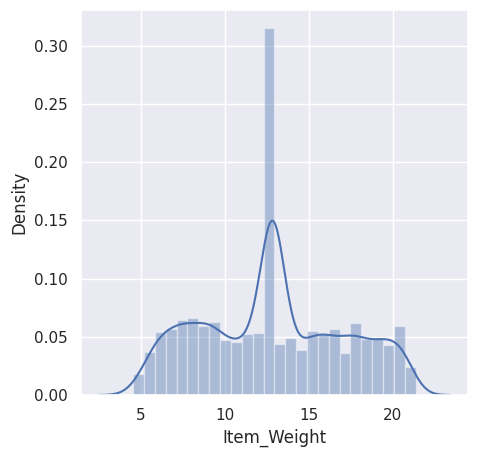

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(data['Item_Weight'])
plt.show()

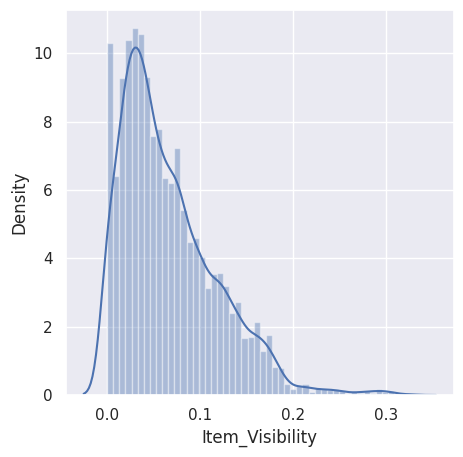

In [ ]:
# Item Visibility distribution
plt.figure(figsize=(5,5))
sns.distplot(data['Item_Visibility'])
plt.show()

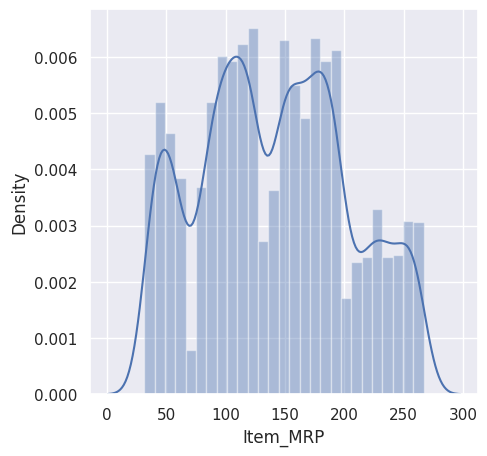

In [ ]:
# Item MRP distribution
plt.figure(figsize=(5,5))
sns.distplot(data['Item_MRP'])
plt.show()

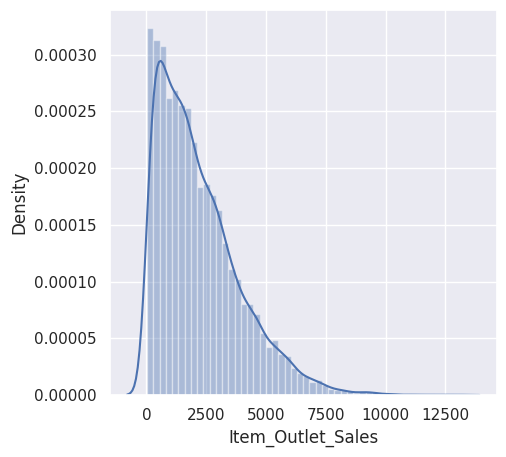

In [ ]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(5,5))
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

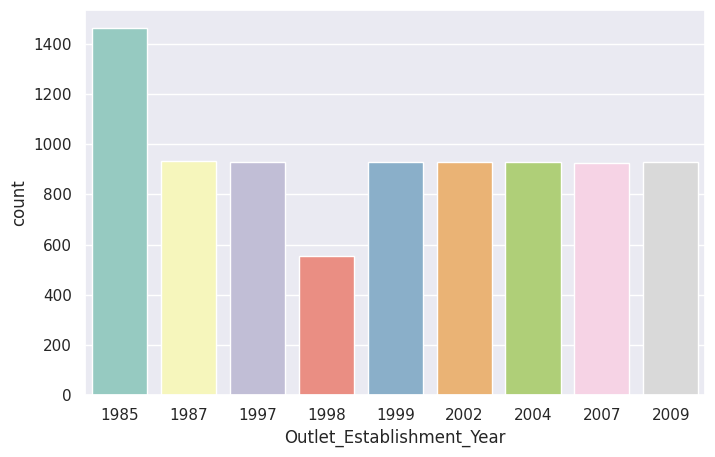

In [ ]:
# Outlet_Establishment_Year column
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Establishment_Year', data=data, palette="Set3")
plt.show()

***Categorical Features***

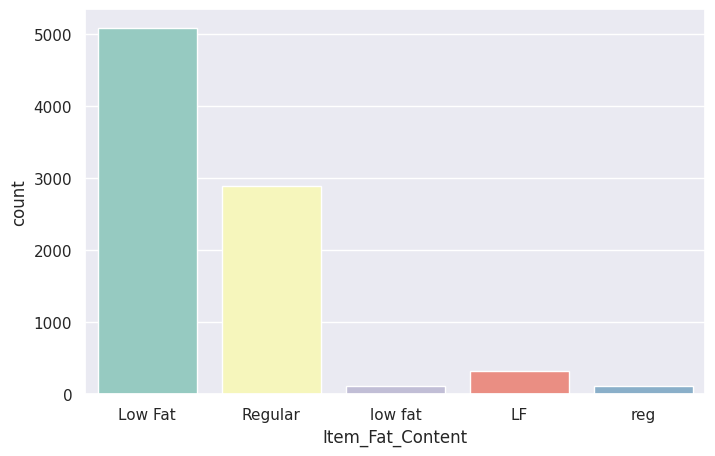

In [ ]:
# Item_Fat_Content column
plt.figure(figsize=(8,5))
sns.countplot(x='Item_Fat_Content', data=data, palette="Set3")
plt.show()

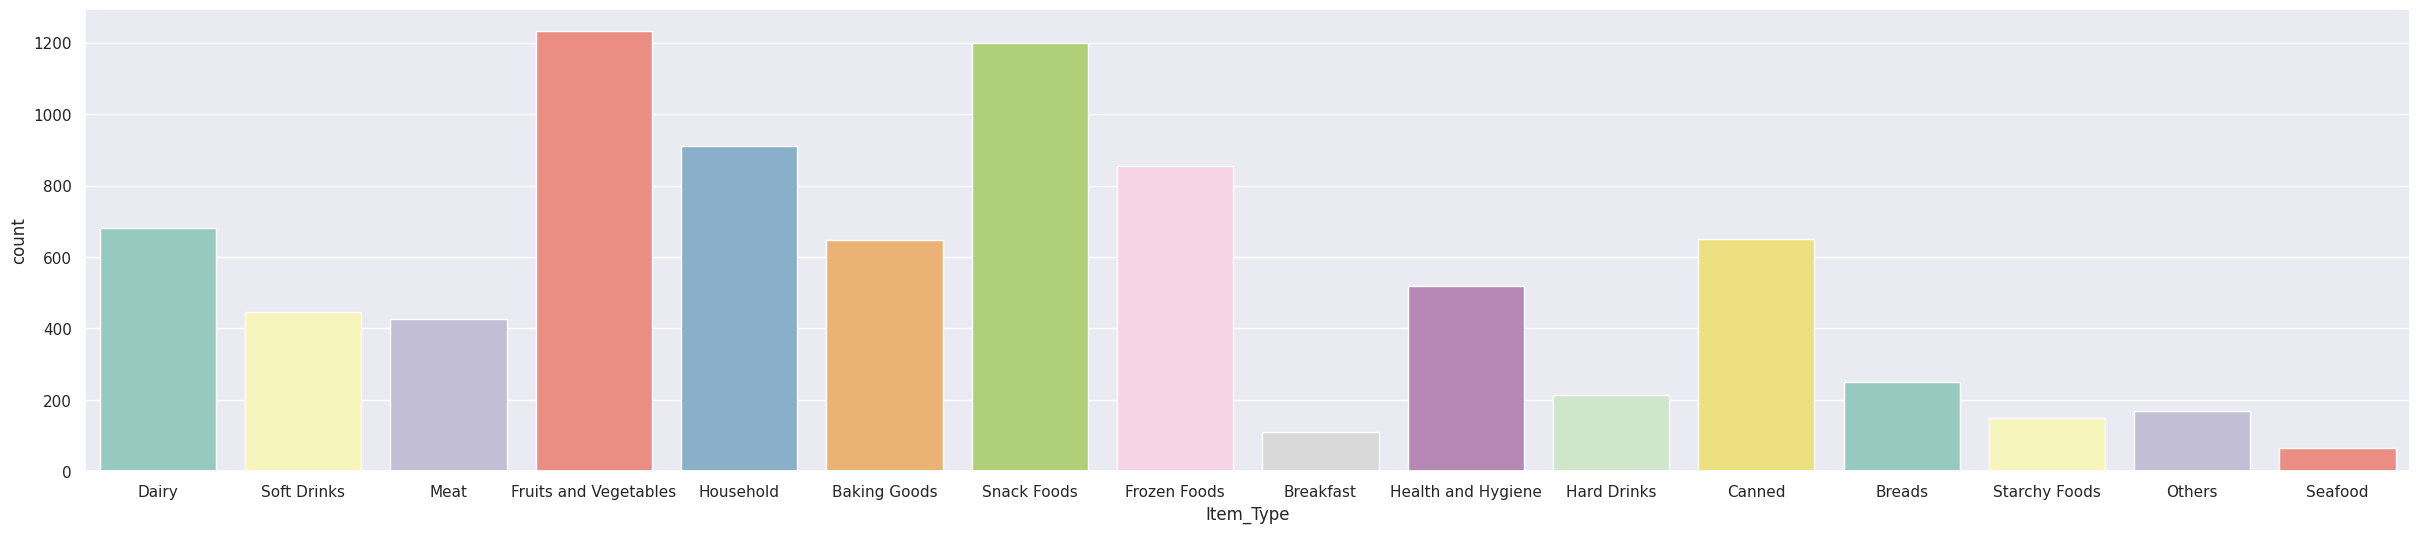

In [ ]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=data, palette='Set3')
plt.show()

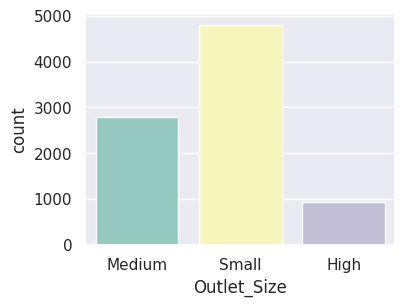

In [ ]:
# Outlet_Size column
plt.figure(figsize=(4,3))
sns.countplot(x='Outlet_Size', data=data, palette="Set3")
plt.show()

# **Data Pre-Processing**

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


# **Label Encoding**

In [ ]:
encoder = LabelEncoder()

In [ ]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])

data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])

data['Item_Type'] = encoder.fit_transform(data['Item_Type'])

data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])

data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])

data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# **Splitting Features and Target**

In [ ]:
X =data.drop(columns='Item_Outlet_Sales', axis=1)
Y =data['Item_Outlet_Sales']

In [ ]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [ ]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


# **Splitting the data into Training data & Testing Data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# **Machine Learning Model Training**

***XGBoost Regressor***

In [ ]:
regressor = XGBRegressor(
    learning_rate=0.05,        # Lower learning rate to prevent overfitting
    n_estimators=200,          # Moderate number of trees
    max_depth=5,               # Limiting tree depth for simplicity
    alpha=0.1,                 # L1 regularization
    reg_lambda=0.1,            # L2 regularization
    random_state=42            # Ensures reproducibility
)


In [ ]:
regressor.fit(X_train, Y_train)

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...)

# **Evaluation**

In [ ]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.7019770405028412


In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
print('R Squared value = ', r2_test)

R Squared value =  0.5728364182089852


# **Model Performance Conclusion**

The performance of the predictive models developed for the Big Mart Sales Prediction project was evaluated using R-squared metrics. Here are the key outcomes:

1. **Training Data Performance**:
   - The XGBoost Regressor achieved an R-squared value of **0.701** on the training dataset. This indicates that the model explains approximately 70% of the variance in the training data, suggesting a good fit.

2. **Test Data Performance**:
   - On the test dataset, the model's R-squared value dropped to **0.573**. This suggests that the model explains about 57% of the variance in the test data, indicating some level of overfitting or challenges in generalization to unseen data.

3. **Model Comparison**:
   - Additionally, attempts to utilize the Random Forest Regressor showed varying results, with its performance needing further tuning to match or exceed the predictive capabilities of the XGBoost model.

These results emphasize the importance of continuous model evaluation and hyperparameter tuning to improve prediction accuracy. The findings also indicate potential areas for improvement, such as exploring additional feature engineering techniques or using ensemble methods to enhance model robustness.

In [ ]:
!pip install ipywidgets


In [ ]:
import joblib
import ipywidgets as widgets
from IPython.display import display

In [ ]:
# Save the trained model to a file
joblib.dump(regressor, '/content/xgb_regressor_model.joblib')

['/content/xgb_regressor_model.joblib']

In [ ]:
# Loading the trained model
model = joblib.load('/content/xgb_regressor_model.joblib')

In [ ]:
# Function to make predictions
def predict_sales(item_mrp, outlet_identifier, outlet_size, outlet_type, outlet_establishment_year):
    # Creating a DataFrame for the input data
    input_data = pd.DataFrame({
        'Item_MRP': [item_mrp],
        'Outlet_Establishment_Year': [outlet_establishment_year],
        'Outlet_Identifier': [outlet_identifier],
        'Outlet_Size': [outlet_size],
        'Outlet_Type': [outlet_type]
    })

    # One-hot encode categorical columns
    input_data = pd.get_dummies(input_data, columns=['Outlet_Identifier', 'Outlet_Size', 'Outlet_Type'], drop_first=True)

    # Adding default values for missing features
    # Ensuring the DataFrame has the same columns as the model expects
    for col in model.get_booster().feature_names:
        if col not in input_data.columns:
            input_data[col] = 0  # Add missing columns with default value 0

    # Reordering the DataFrame to match the model's expected feature order
    input_data = input_data[model.get_booster().feature_names]

    # Making prediction
    prediction = model.predict(input_data)

    # Formatting the prediction output
    formatted_prediction = (
        f"The predicted sales for an item priced at ${item_mrp:.2f} sold in outlet '{outlet_identifier}', "
        f"which is a '{outlet_size}' sized '{outlet_type}' established in {outlet_establishment_year}, is: "
        f"${prediction[0]:.2f}."
    )

    return formatted_prediction

# Creating dropdown widgets for user input with options from the dataset
item_mrp_widget = widgets.FloatSlider(
    value=100.0,
    min=50.0,
    max=250.0,
    step=1.0,
    description='Item MRP:',
    continuous_update=False
)

# Update widget options based on values in the dataset
outlet_identifier_widget = widgets.Dropdown(
    options=["OUT049", "OUT018", "OUT010", "OUT013"],  # Use values found in the training dataset
    description='Outlet ID:'
)

outlet_size_widget = widgets.Dropdown(
    options=["Small", "Medium", "High"],  # Use values from the dataset
    description='Outlet Size:',
    value='Medium'
)

outlet_type_widget = widgets.Dropdown(
    options=["Grocery Store", "Supermarket Type1", "Supermarket Type2", "Supermarket Type3"],
    description='Outlet Type:',
    value='Supermarket Type1'
)

outlet_establishment_year_widget = widgets.Dropdown(
    options=[1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009],  # Example establishment years based on data
    description='Est. Year:'
)

In [ ]:
# Creating a button to trigger the prediction
predict_button = widgets.Button(description='Predict Sales')

# Function to handle button click
def on_predict_button_clicked(b):
    prediction_result = predict_sales(
        item_mrp_widget.value,
        outlet_identifier_widget.value,
        outlet_size_widget.value,
        outlet_type_widget.value,
        outlet_establishment_year_widget.value
    )
    # Clear previous output and display the result
    output_widget.clear_output()
    with output_widget:
        print(prediction_result)

# Output widget to display predictions
output_widget = widgets.Output()

# Attaching the button click event
predict_button.on_click(on_predict_button_clicked)

# Display the widgets and button
display(item_mrp_widget, outlet_identifier_widget, outlet_size_widget, outlet_type_widget, outlet_establishment_year_widget, predict_button, output_widget)

FloatSlider(value=160.0, continuous_update=False, description='Item MRP:', max=250.0, min=50.0, step=1.0)

Dropdown(description='Outlet ID:', index=2, options=('OUT049', 'OUT018', 'OUT010', 'OUT013'), value='OUT010')

Dropdown(description='Outlet Size:', index=2, options=('Small', 'Medium', 'High'), value='High')

Dropdown(description='Outlet Type:', options=('Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supe…

Dropdown(description='Est. Year:', index=8, options=(1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009), va…

Button(description='Predict Sales', style=ButtonStyle())

Output()